The goal of the Tabular Playground Series is to provide the Kaggle community with a variety of fairly light-weight challenges that can be used to learn and sharpen skills in different aspects of machine learning and data science. The duration of each competition will generally only last a few weeks, and may have longer or shorter durations depending on the challenge. The challenges will generally use fairly light-weight datasets that are synthetically generated from real-world data, and will provide an opportunity to quickly iterate through various model and feature engineering ideas, create visualizations, etc.

## Synthetically-Generated Datasets
Using synthetic data for Playground competitions allows us to strike a balance between having real-world data (with named features) and ensuring test labels are not publicly available. This allows us to host competitions with more interesting datasets than in the past. While there are still challenges with synthetic data generation, the state-of-the-art is much better now than when we started the Tabular Playground Series two years ago, and that goal is to produce datasets that have far fewer artifacts. Please feel free to give us feedback on the datasets for the different competitions so that we can continue to improve!

## Library Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Loading and Preliminary Desciption

In [2]:
df = pd.read_csv("train.csv",index_col=0)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [5]:
#Correlation testing
df[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','loan_status']].corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
person_age,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


Person's age has a strong positive correlation with his credit history - indicating more loans as one gets older.
The loan amount has a positive correlation with the income one obtains. This correlation is however not very strong.
The length of employment has a small correlation with the amount of loan granted.
The Loan Amount is greatly affected by the loan percent income which has a correlation of 0.64 with the loan amount.

In [6]:
df['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

### Defaulters by Loan Intents

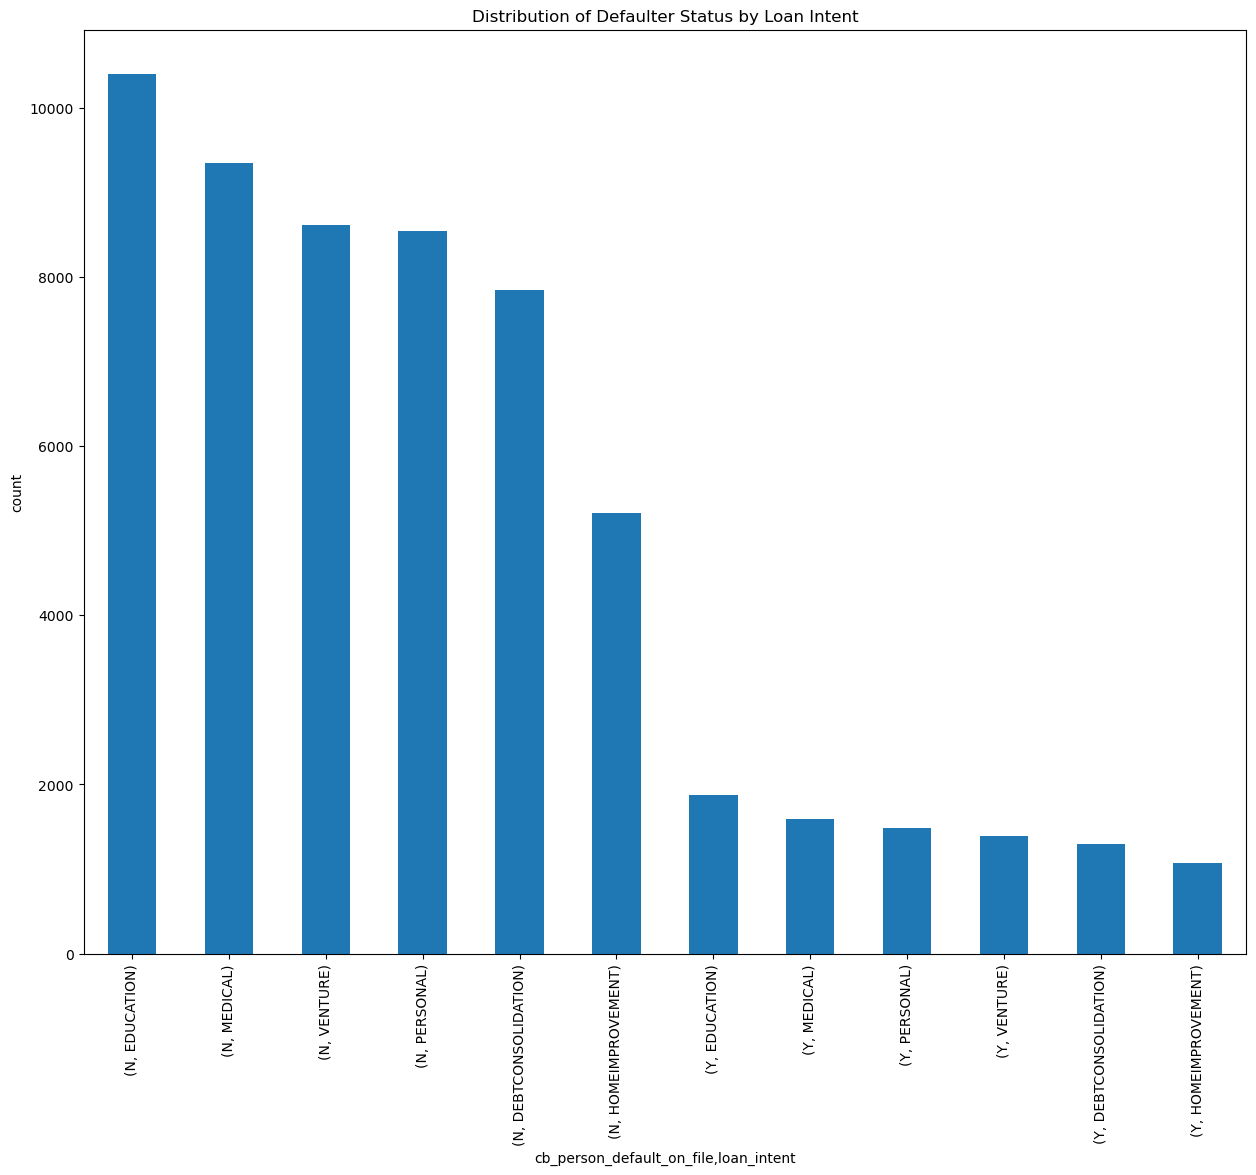

In [7]:
plt.figure(figsize=(15,12))
Figure_1 = df.groupby('cb_person_default_on_file').loan_intent.value_counts().plot(kind='bar',ylabel="count",
                                                                                   title='Distribution of Defaulter Status by Loan Intent',
                                                                                    )

Majority of the persons in the database seek loans for educational and medical cases. With Home Improvement being the least common intention.

### Loans per Age

(array([ 1807., 14777., 11462.,  8324.,  6977.,  4250.,  2871.,  1903.,
         2109.,  1281.,   871.,   611.,   392.,   289.,   156.,   132.,
          137.,    94.,    54.,    69.]),
 array([20., 22., 24., 26., 28., 30., 32., 34., 36., 38., 40., 42., 44.,
        46., 48., 50., 52., 54., 56., 58., 60.]),
 <BarContainer object of 20 artists>)

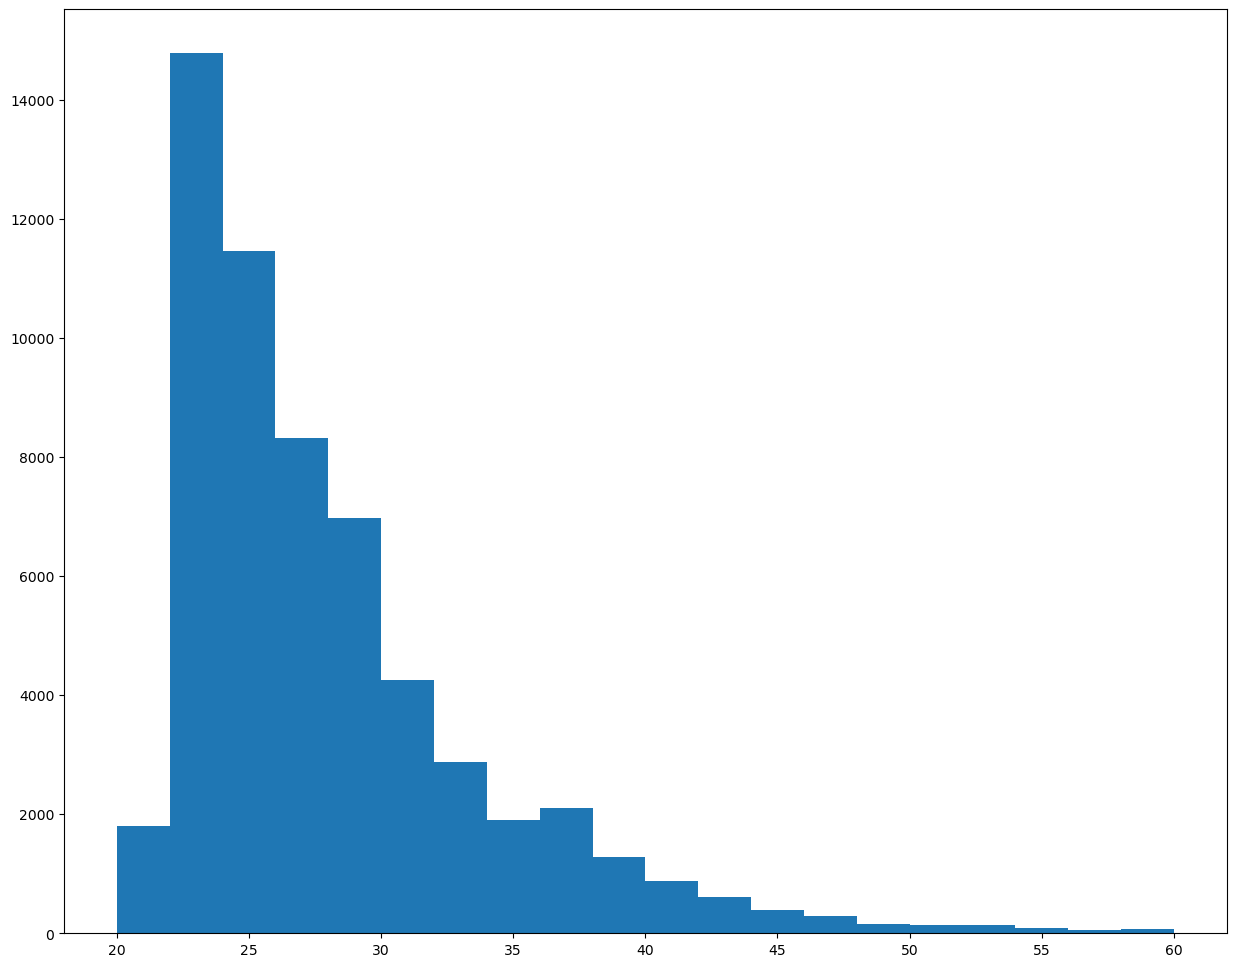

In [8]:
plt.figure(figsize=(15,12))
Figure_2 = plt.hist(x='person_age', data=df,rwidth=10,range=(20,60),bins=20)
Figure_2

Majority of the loan takers are averagely 22-24 years old. With a deacrease in loans as the age progresses.
The least number of loans is taken by persons about 60 years old.

### Defaulters by age

Text(0.5, 1.0, 'Defaulters per Age')

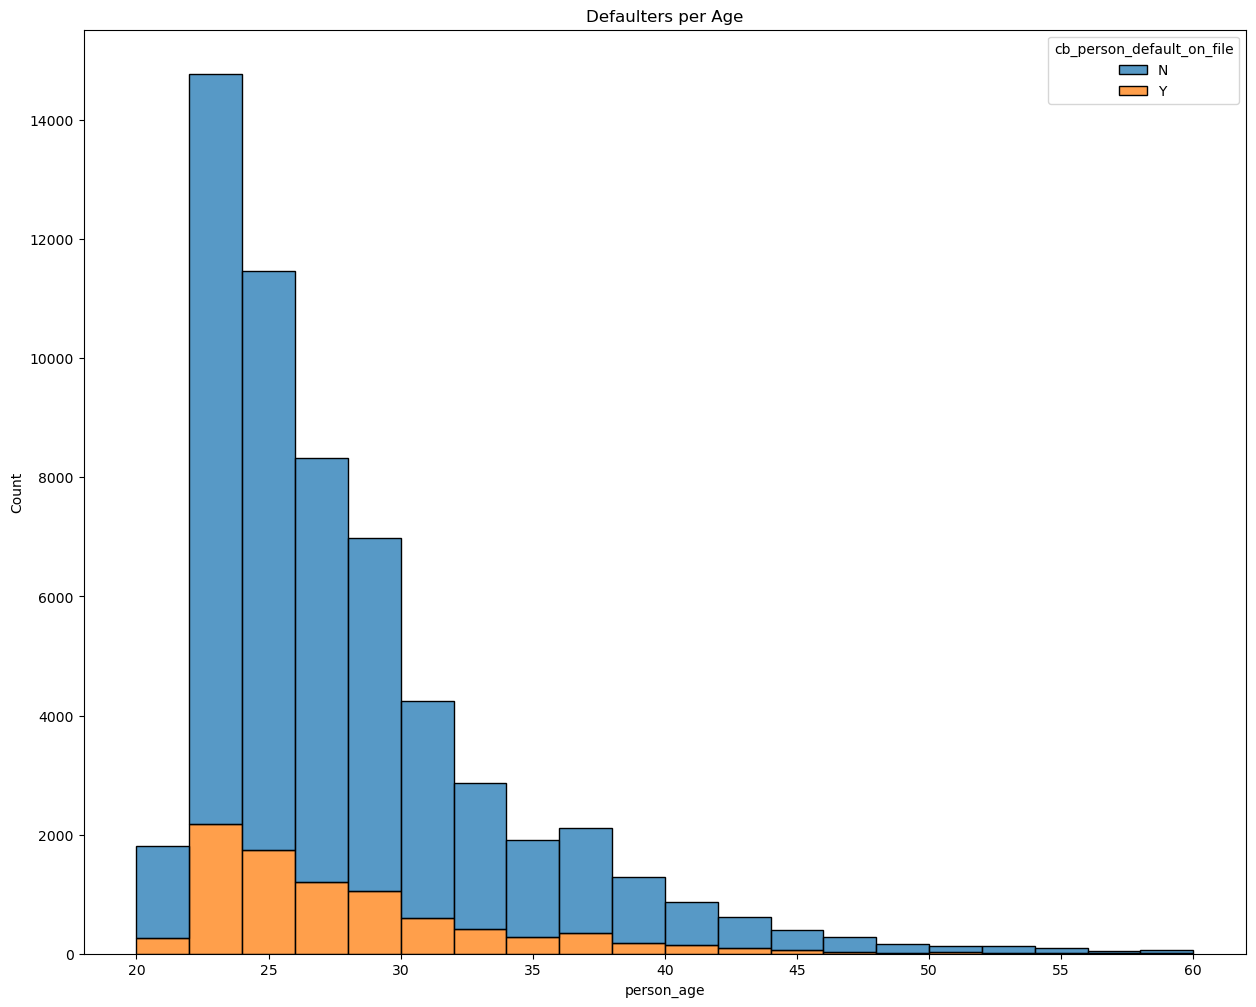

In [9]:
plt.figure(figsize=(15,12))
Figure_3 = sns.histplot(x='person_age',data=df, hue='cb_person_default_on_file',
                        binwidth=2,binrange=(20,60),legend='cb_person_default_on_file',multiple='stack',stat='count')
Figure_3 = plt.title("Defaulters per Age")
Figure_3

Between Age 22-24 years, we have the highest levels of defaulters in the file records. To note the same bracket has the highest number of non defaulters in the same duration.
This clarifies majority of the population taking loans are within the same age group of 22-25 years.
It can also be infered that is also a population that is investing in Education and learning as most are taking loans for educational purposes.

### Personal Income Effect

Text(0.5, 1.0, 'Defaulters per Income')

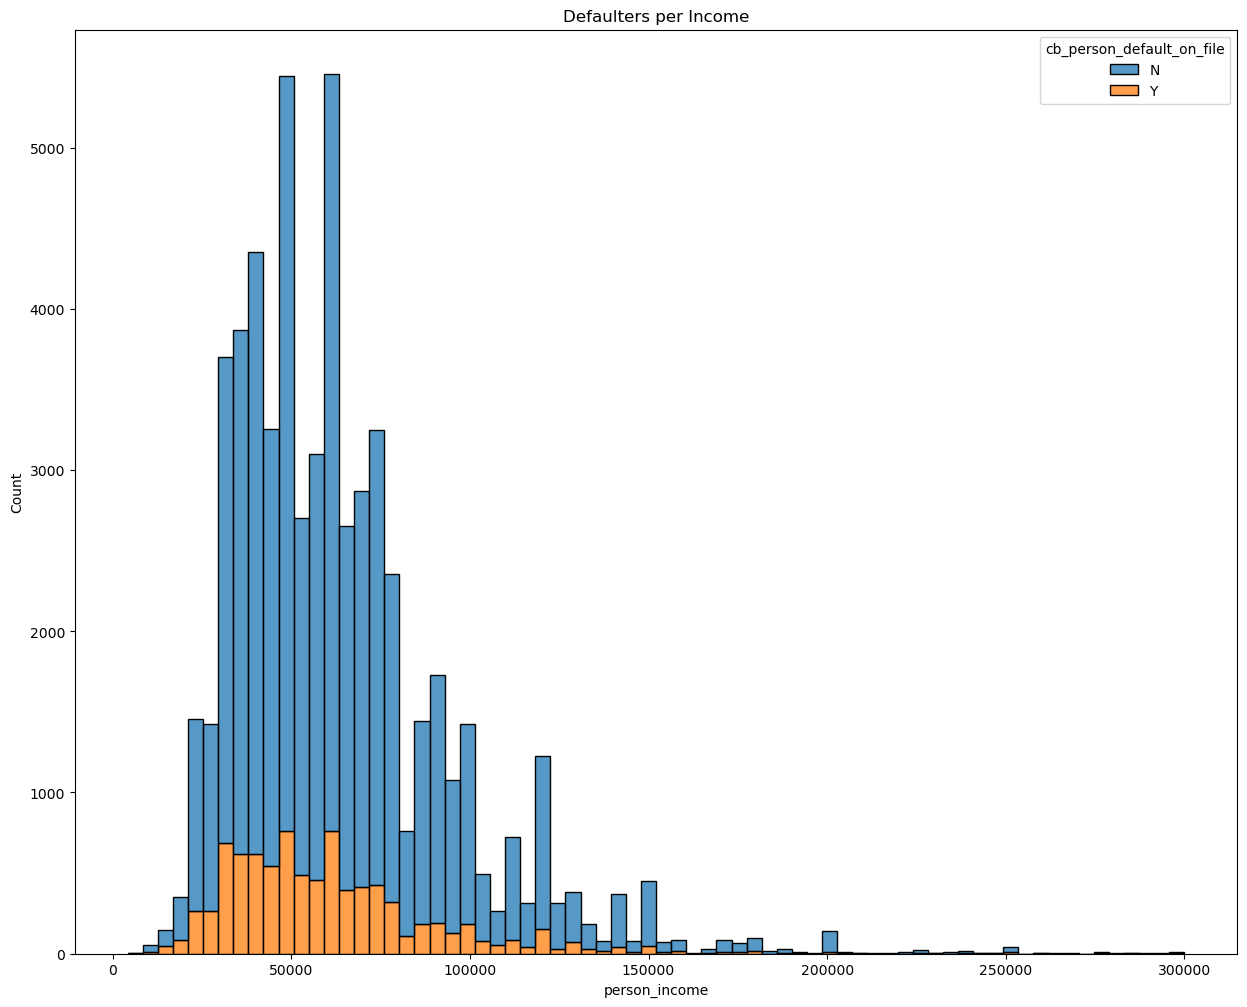

In [10]:
plt.figure(figsize=(15,12))
Figure_ = sns.histplot(x='person_income',data=df, hue='cb_person_default_on_file',bins=5,
                        legend='cb_person_default_on_file',multiple='stack',binwidth=4200,binrange=(4200,300000))
Figure_4 = plt.title("Defaulters per Income")
Figure_4

In [11]:
highest_income = df['person_income'].max()
income_max_id = df['person_income'].idxmax()
income_min_id = df['person_income'].idxmin()

print(f'The highest income is {highest_income} and the loan intents is {df['loan_intent'].iloc[income_max_id]} at the age of {df['person_age'].iloc[income_max_id]} ')

print(f'The lowest income is {df['person_income'].min()} and the loan intents is {df['loan_intent'].iloc[income_min_id]} at the age of {df['person_age'].iloc[income_min_id]}')

The highest income is 1900000 and the loan intents is EDUCATION at the age of 22 
The lowest income is 4200 and the loan intents is MEDICAL at the age of 25


Majority of the persons in the dataset have a personal income of below 62,500 which is below the average of the dataset
The group earning the lowest(being the majority in the dataset) have the highest number of defaulters and non defaulters.
The number of defaulters reduces as the personal income increases.
The number of loans taken reduces with increase in personal income - People with higher incomes are able to meet their needs without loans.

### Data Prep- ML

Creation of dummy columns to take care of categorical data before proceeding to machine learning

In [12]:
df2 = pd.get_dummies(columns=['cb_person_default_on_file','loan_intent','person_home_ownership','loan_grade'],data=df,dtype=int)
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,cb_person_default_on_file_N,cb_person_default_on_file_Y,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
id,,,,,,,,,,,,,,,,,,,,,
0,37,35000,0.0,6000,11.49,0.17,14,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,22,56000,6.0,4000,13.35,0.07,2,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,29,28800,8.0,6000,8.90,0.21,10,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,30,70000,14.0,12000,11.11,0.17,5,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,22,60000,2.0,6000,6.92,0.10,3,0,1,0,...,0,0,1,1,0,0,0,0,0,0


Importation of machine learning models and training.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LNR
from sklearn.kernel_ridge import KernelRidge as KRM
from sklearn.metrics import f1_score,r2_score,mean_squared_error,accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [14]:
y=np.array(df2['loan_status'])
x=np.array(df2.drop(columns='loan_status'))

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVC()

clf = GridSearchCV(estimator=svc,param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
clf.fit(X=x, y=y)
sorted(clf.cv_results_.keys())

### Random Forest Classifier

In [ ]:
Lr =RandomForestClassifier(max_leaf_nodes=46916,random_state=42,bootstrap=True)
Lr.fit(X=x_train,y=y_train)

In [ ]:
Lr.get_params()

In [ ]:
y_predict = Lr.predict(x_test)

In [ ]:
y_test.astype(float)

In [ ]:
y_predict.dtype

In [ ]:
# f1_score(y_pred=y_predict,y_true=y_test)
#Results with bootstrap=True,max_depth=500,random_state=42
Acc_score = accuracy_score(y_true=y_test, y_pred=y_predict)
F1_Scores = f1_score(y_true=y_test, y_pred=y_predict)
print(f'For Random Forest classifier the accuracy is {Acc_score} and the F1 Score of {F1_Scores}')

In [ ]:
#Results with max_leaf_nodes=46916,random_state=42,bootstrap=True as the parameters
Acc_score = accuracy_score(y_true=y_test, y_pred=y_predict)
F1_Scores = f1_score(y_true=y_test, y_pred=y_predict)
print(f'For Random Forest classifier the accuracy is {Acc_score} and the F1 Score of {F1_Scores}')

### K-Nearest Neighbour Model (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier(algorithm='ball_tree',n_neighbors=8)

In [ ]:
KNN.get_params()

In [ ]:
KNN.fit(X=x_train,y=y_train)

In [ ]:
y_knn_test_predicted = KNN.predict(x_test)

In [ ]:
Acc_score_knn = accuracy_score(y_true=y_test, y_pred=y_knn_test_predicted)
F1_Scores_knn = f1_score(y_true=y_test, y_pred=y_knn_test_predicted)
print(f'For K_nearest neighbours(N=10) the accuracy is {Acc_score_knn} and the F1 Score of {F1_Scores_knn}')